In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

winedf = pd.read_csv('winequality-red.csv',sep=';')
print(winedf.head(3))
print("\n")

# X are characteristics that determine Y
X=winedf.drop(['quality'], axis=1)
Y=winedf['quality'] # quality output defined by chars

# Y label distribution (5 and 6 are imbalanced)
print("Y Label Distribution:")
print(winedf['quality'].value_counts())
print("\n")

# Auto-correlation and covariance plots
# %matplotlib inline
# matplotlib.style.use('ggplot')
# plt.scatter(wine)

from sklearn.svm import SVC   # Support Vector Classifier
from sklearn.preprocessing import StandardScaler   # subtracts mean from each feature and scales to unit var
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Pipeline: Scale, PCA or SVD, then the estimator (i.e. SVM or RandomTree)
steps = [('scaler', StandardScaler()), ('pca', PCA()), ('SVM', SVC())]
pipeline = Pipeline(steps)  # can use make_pipeline instead

# Pipeline with list of steps to perform for modeling
# final step has to be the estimator
# steps = [('scaler', StandardScaler()), ('SVM', SVC())]
# pipeline = Pipeline(steps)  # can use make_pipeline instead

# Divide the dataset into training and testset with random state and stratified K-fold
# Random state seed gives us reproducable random number (repeats training)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=30, stratify=Y)

# GridSearch params: PCA and SVM optimized with gamma and C params
params = {
    'pca__n_components': [2],
    'SVM__C': [0.001, 0.1, 10, 100, 10e5],
    'SVM__gamma': [0.1, 0.01]
}

# GridSearch for finding the best params for modeling
grid = GridSearchCV(pipeline, param_grid=params, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  


Y Label Distribution:
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64




NameError: name 'PCA' is not defined

X.shape = (1599, 11)
Y.shape = (1599,)


X PCA components shape = (4, 11)
X PCA transform shape = (1599, 4)


Variance ration of 4-principal components:  [0.94747384 0.04841413 0.00259163 0.00152041]


Grid Search CV Results:
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'mean_train_score', 'param_SVM__C', 'param_SVM__gamma', 'params', 'rank_test_score', 'split0_test_score', 'split0_train_score', 'split1_test_score', 'split1_train_score', 'split2_test_score', 'split2_train_score', 'split3_test_score', 'split3_train_score', 'split4_test_score', 'split4_train_score', 'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score']


Data Frame Results:
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_SVM__C  \
0       0.045694      0.026240         0.009083        0.002921        0.001   
1       0.035405      0.003978         0.009272        0.001821        0.001   
2       0.044758      0.006998         0.007991        0.001475          0.1   
3    

Text(0, 0.5, 'Predicted Values')

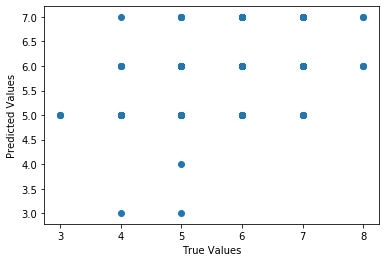

In [55]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

# Shapes of the data and labels for X and Y resp.
print("X.shape = " + str(X.shape))
print("Y.shape = " + str(Y.shape))
print("\n")

# Apply PCA to reduce 11D space to 2D space
# this is run as a test case before the pipeline
pca = PCA(n_components=4)
pca.fit(X)
print("X PCA components shape = %s" % str(pca.components_.shape))
x_pca = pca.transform(X)
print("X PCA transform shape = " + str(x_pca.shape))
print("\n")

# Find the variance of 4 components to see the contribution
x_var = np.var(x_pca, axis=0)
x_var_rat = x_var/(np.sum(x_var))
print("Variance ration of 4-principal components: ", x_var_rat)
print("\n")

# Grid Search CV outputs for comparing model outputs
# where a model is based on the params/hyperparams
print("Grid Search CV Results:")
print(sorted(grid.cv_results_.keys()))
print("\n")

# convert CV results to DataFrame
df_results = pd.DataFrame(grid.cv_results_)
print("Data Frame Results:")
print(df_results)
print("\n")

train0key = 'split0_train_score'
test0key = 'split0_test_score'

print("CV Results Split 0 Train:")
print(grid.cv_results_[train0key])
print("\n")

print("CV Results Split 0 Test:")
print(grid.cv_results_[test0key])
print("\n")

# print(grid.cv_results_)
print("Test Score = %3.2f" % (grid.score(X_test, y_test)))
print("Train Score = %3.2f" % (grid.score(X_train, y_train)))
print("Best params = " + str(grid.best_params_))

# Predict output values for input X_test using model from training
y_predict = grid.predict(X_test)
plt.scatter(y_test, y_predict)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")